In [1]:
import json, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict
import matplotlib.gridspec as gridspec
# domain = "attraction"
domains = ["train", "hotel", "rest", "taxi", "attraction"]
metric1 = "GCA"
other_metrics = ["JGA", "SA","FGA_0.5","AGA","RSA"]
# other_metrics = ["JGA", "AGA", "FGA", "SA", "RSA"]
include_keys = [0.01, 0.05,0.1,0.3,0.5,0.7,0.9,1.0]
# include_keys = [0.01, 0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

FileNotFoundError: [Errno 2] No such file or directory: '../results/T5_fewshot_train'

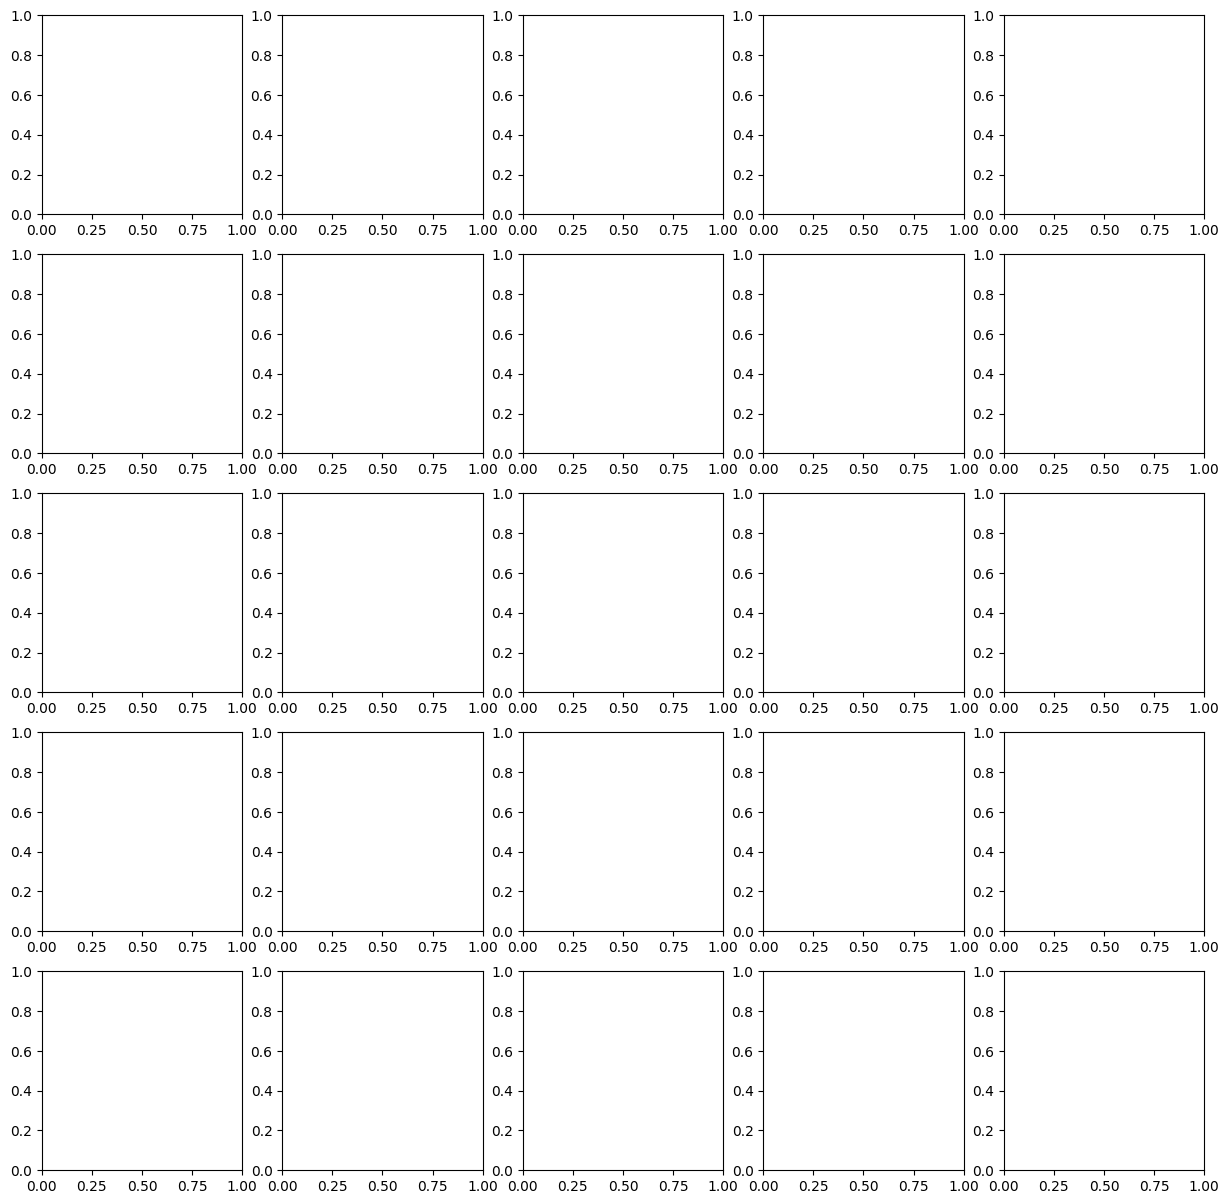

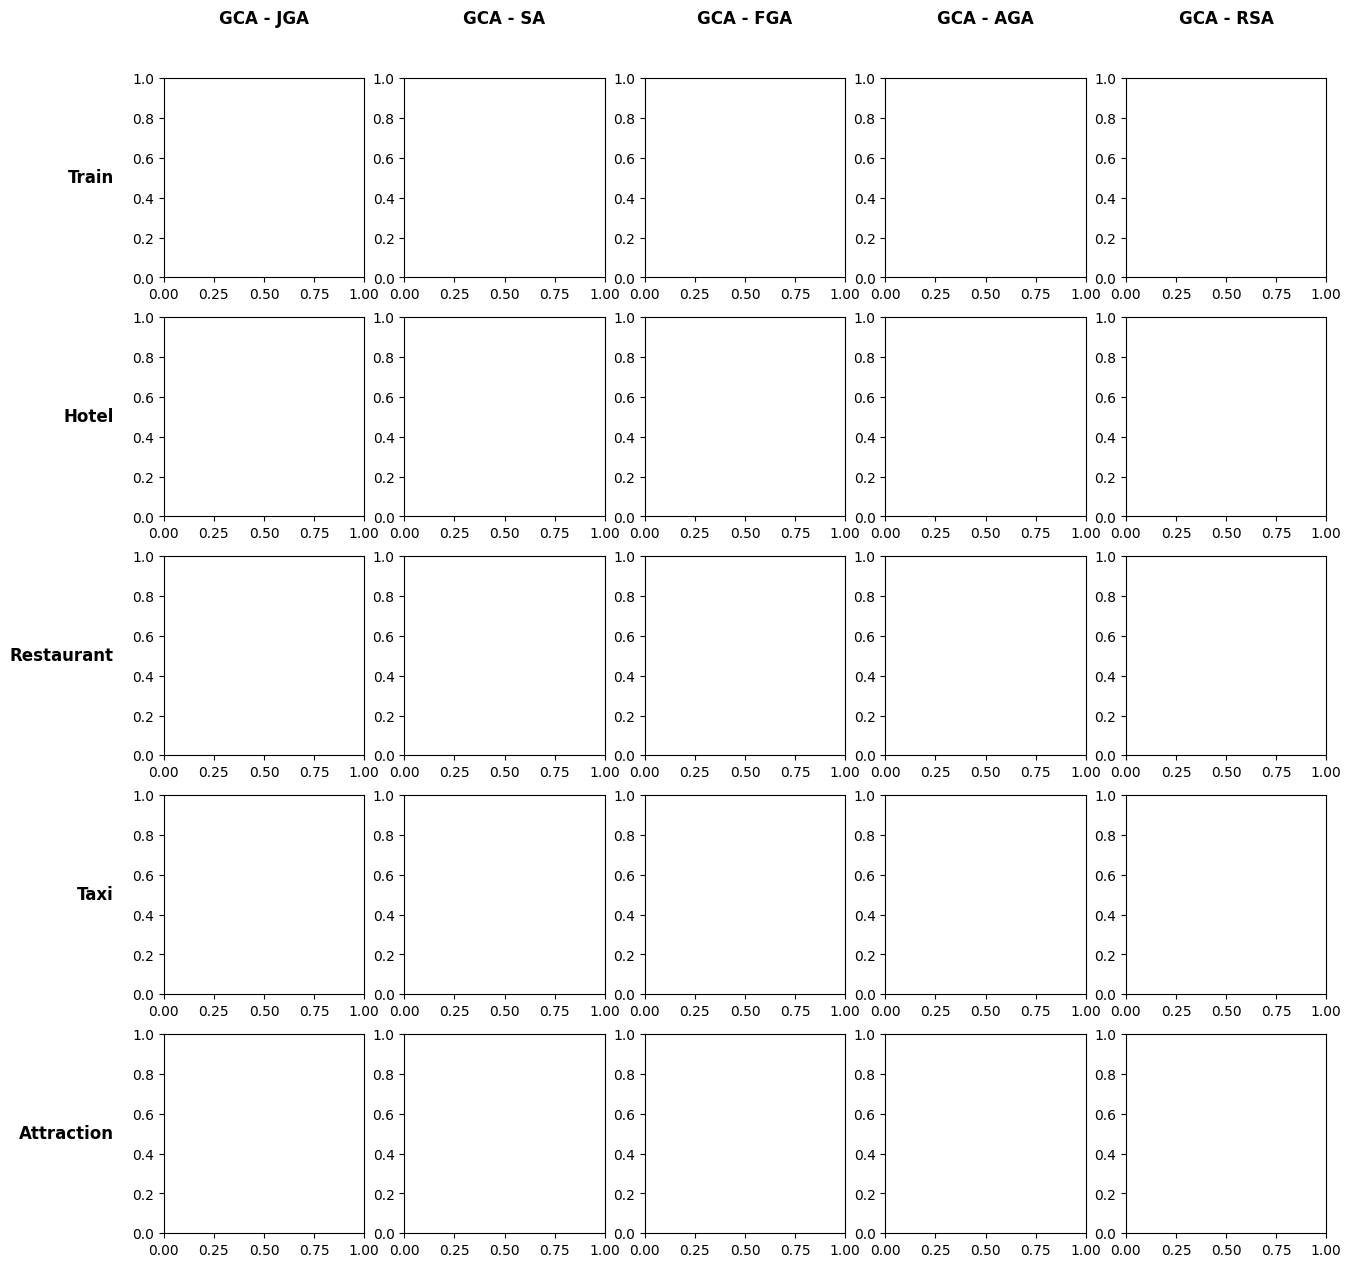

In [2]:
output_file = "../analyses/plots/fewshot_comparison.pdf"
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
raveled_axes = (x for x in axes.ravel())

# Create a grid with space for titles
gs = gridspec.GridSpec(5, 5)

fig = plt.figure(figsize=(15, 15))
raveled_axes = [fig.add_subplot(gs[i, j]) for i in range(5) for j in range(5)]

# Assuming `domains` is a list like ["train", "test", ...]
# and `other_metrics` is a list like ["JGA", "KLM", ...]

# Label rows by domain
for i, domain in enumerate(domains):
    if "rest" in domain:
        domain = "restaurant"
    domain = domain.capitalize()
    raveled_axes[i*5].annotate(domain, xy=(0, 0.5), xytext=(-raveled_axes[i*5].yaxis.labelpad - 5, 0),
                        xycoords=raveled_axes[i*5].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center', fontweight='bold')

# Label columns by metrics
for i, metric in enumerate(other_metrics):
    if "FGA" in metric:
        metric = "FGA"
    text = f"GCA - {metric}"
    raveled_axes[i].annotate(text, xy=(0.5, 1), xytext=(0, raveled_axes[i].xaxis.labelpad + 200),
                        xycoords=raveled_axes[i].xaxis.label, textcoords='offset points',
                        size='large', ha='center', va='baseline', fontweight='bold')


for domain in domains:
    folder = "../results/T5_fewshot_{}".format(domain)

    all_results= []
    model_names = []
    for filename in os.listdir(folder):
        all_metrics = {}
        result_file = os.path.join(folder, filename)
        model_names.append(filename.split(".json")[0])
        with open(result_file,"r") as f:
            result_dic = json.load(f)
            for k,v in result_dic.items():
                all_metrics[k] = v
        all_results.append(all_metrics)

    results_dict = {k:v for (k,v) in zip(model_names,all_results)}


    results_dict_new = OrderedDict(sorted(results_dict.items(), key = lambda name: float(name[0].split("_")[1])))


    indices = [i for i in range(len(results_dict_new.keys())) if float(list(results_dict_new.keys())[i].split("_")[1]) in include_keys]

    model_names = [list(results_dict_new.keys())[i] for i in indices]
    all_results = [results_dict_new[list(results_dict_new.keys())[i]] for i in indices]
    # all_results = list(results_dict_new.values())



    for metric2 in other_metrics:
        
        
        # ax = next(raveled_axes)
        ax = raveled_axes.pop(0)
        
        # x-axis values
        x = [name.split("_")[1] for name in model_names]

        # y-axis values for first line plot (blue)
        y1 = [y[metric1] for y in all_results]

        # y-axis values for second line plot (green)
        y2 = [y[metric2] for y in all_results]

        diff = [abs(y1[i] - y2[i]) for i in range(len(y1))]

        # print(y1)
        # print(y2)

        # plot the two lines
        # plt.plot(x, y1, color='green')
        # plt.plot(x, y2, color='green')
        if abs(diff[-1]) > abs(diff[0]):
            clr = 'blue'
        else:
            clr = 'red'

        ax.plot(x, diff, color=clr)

        # plt.ylim(ymin=0)
        # fill in the area between the two lines with red color
        # mask = np.array(y2) < np.array(y1)
        # x_masked = np.array(x)[mask]
        # y1_masked = np.array(y1)[mask]
        # y2_masked = np.array(y2)[mask]
        # plt.fill_between(x_masked, y1_masked, y2_masked, color='red', interpolate=True)
        metric2_name = metric2
        if "FGA" in metric2:
            metric2_name = "FGA"
        # ax.set_title("{} - {} | {}".format(metric1,metric2_name,domain))
        # ax.xlabel("Ratio of data used in training")
        # ax.ylabel("|{} - {}|".format(metric1,metric2_name))

plt.tight_layout()
plt.savefig(output_file, bbox_inches='tight',format='pdf')
plt.show()

